In [1]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# ***Triadic Closure***

***Triadic closure is the tendecy for people who share a lot of connections to become connected themselves.           
E.g. people who share many friends have an increased likelihood of becoming friends themselves compared to who do not share any or who with a small number of common friends.       
In a network this question becomes what edges may show up next?         
Generally new edges that will form closed triangles with existing edges are good candidates!***

## ***A way to measure this triadic closure is through clustering:***

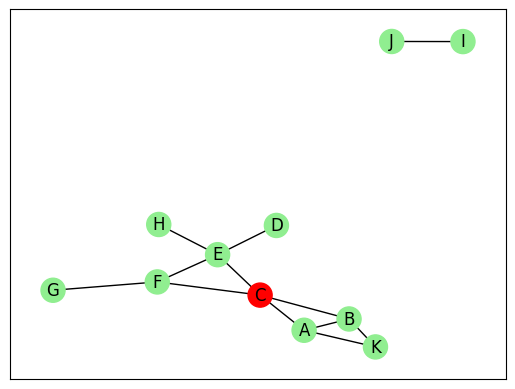

In [2]:
# local clustering cod=efficient is the fraction of pairs of a node's friends that are friends with one another.

graph = nx.Graph()
graph.add_edges_from([("A", "B"), ("A", "C"), ("A", "K"), ("B", "K"), ("B", "C"), ("C", "F"), ("C", "E"), ("C", "F"), ("F", "G"), ("E", "D"),
                     ("E", "H"), ("E", "F"), ("I", "J")])

pos = nx.spring_layout(graph)
nx.set_node_attributes(graph, "lightgreen", "color")
graph.add_node("C", color = "red")


# let's consider the node C for example
nx.draw_networkx(graph, node_color = nx.get_node_attributes(graph, "color").values(), pos = pos)

In [3]:
# local clustering coefficient of C

# number of pairs of C's friends who are friends with one another is 2: (F, E), (A, B)

# node C has 4 friends (a degree of 4), degree of a node tells how many nodes that are directly connected to it.

# total number of friends pairs that can be formed from C's friends is 6 
# (A, B), (A, E), (A, F), (B, E), (B, F), (E, F)

# this can be computed by val = {degrees_of_given_node * (degrees_of_given_node - 1)} / 2

# local clustering coefficient for the node C is 2 / 6 = 1/3

# This reads as 1/3 of all possible pairs of C's friends who could be friends are actually friends.

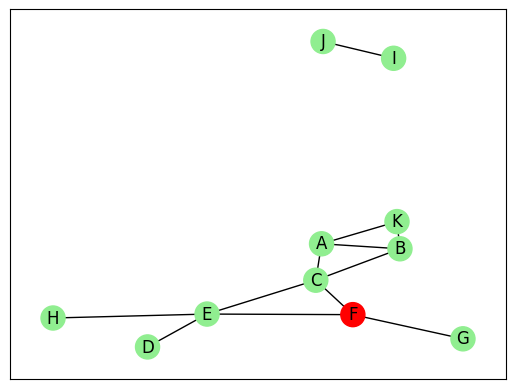

In [4]:
graph = nx.Graph()
graph.add_edges_from([("A", "B"), ("A", "C"), ("A", "K"), ("B", "K"), ("B", "C"), ("C", "F"), ("C", "E"), ("C", "F"), ("F", "G"), ("E", "D"),
                     ("E", "H"), ("E", "F"), ("I", "J")])

pos = nx.spring_layout(graph)
nx.set_node_attributes(graph, "lightgreen", "color")
graph.add_node("F", color = "red")


# let's consider the node C for example
nx.draw_networkx(graph, node_color = nx.get_node_attributes(graph, "color").values(), pos = pos)

In [5]:
# let's consider the node F
# F has 3 friends (degrees)

nx.degree(graph)

DegreeView({'A': 3, 'B': 3, 'C': 4, 'K': 2, 'F': 3, 'E': 4, 'G': 1, 'D': 1, 'H': 1, 'I': 1, 'J': 1})

In [6]:
# so the possible friends pairs are 3 (C, G), (C, E) and (E, G)
# of these only (E, E) are actually friends
# thus, the local clustering coefficient of F is 1/3

In [7]:
# for node J there is just one friend
# in such cases a local clustering coefficient of 0 is assumed

In [8]:
nx.clustering(graph, "C")

0.3333333333333333

In [9]:
nx.clustering(graph, "F")

0.3333333333333333

In [10]:
nx.clustering(graph, "J")

0

In [11]:
nx.clustering(graph, "B")

0.6666666666666666

### ***Global clustering coefficient***

In [14]:
# Measuring local clustering coefficient is quite straightfoward
# There are two approaches to measure global clustering coefficient
# The first one is to average the local clustering coefficients of all individual nodes in the graph
# The second one is to measure the % of open triads in the network
# an open triad is a triangle without one edge (3 nodes & 2 edges)

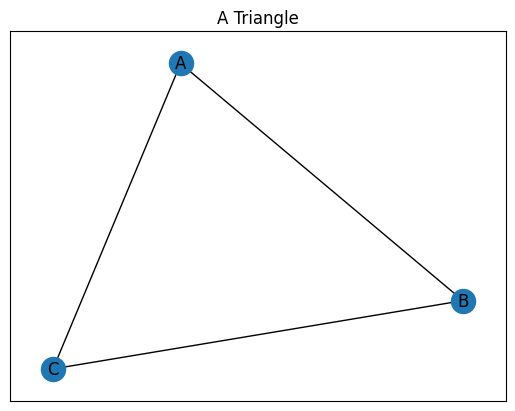

In [15]:
triangle = nx.Graph()
triangle.add_edges_from([("A", "B"), ("A", "C"), ("B", "C")])
nx.draw_networkx(triangle)
plt.title("A Triangle")
plt.show()

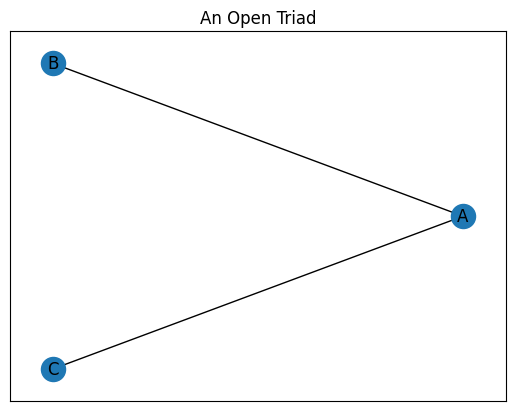

In [16]:
open_triad = nx.Graph()
open_triad.add_edges_from([("A", "B"), ("A", "C")])
positions = nx.circular_layout(open_triad)
nx.draw_networkx(open_triad, pos = positions)
plt.title("An Open Triad")
plt.show()

In [17]:
np.mean([nx.clustering(graph, node) for node in graph.nodes])

0.28787878787878785

In [18]:
print(f"Global clustering coefficient using the first approach is {nx.average_clustering(graph)}.")

Global clustering coefficient using the first approach is 0.28787878787878785.


In [19]:
# in case of open triads, each triangle in a network will encompass three different open triads
# just pop an edge and you'll get an open triad

# second method -> {Number of closed triads (triangles) * 3} / Number of open triads
# this is known as the transitivity of the graph

nx.transitivity(graph)

0.4090909090909091

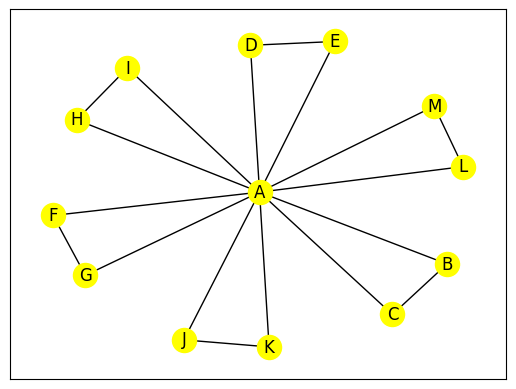

In [20]:
# so, there are two different ways to measure the global clustering coefficient
# are these two ways identical or do they differ? If so, how do they differ?

# Transitivity weights nodes with higher degrees higher
# let's make a wheel looking graph
from string import ascii_uppercase

radials = [("A", char) for char in ascii_uppercase[1:13]]
peripherals = [(char_1, char_2) for (char_1, char_2) in zip(ascii_uppercase[1::2][:6], ascii_uppercase[2::2][:6])]
edges = radials + peripherals

wheel = nx.Graph()
wheel.add_edges_from(edges)
pos = nx.spring_layout(wheel)
nx.draw_networkx(wheel, node_color = "yellow", pos = pos)

In [21]:
# in the above graph most nodes have a pretty high local clustering coefficient.
# take D, lcc = 1
# all nodes on the outside have a lcc of 1
# the central node has a lcc of 6/{(12 * 11)/2} = 0.09090909090909091

print("LCC of central node of the wheel (A) is {}".format(nx.clustering(wheel, "A")))

LCC of central node of the wheel (A) is 0.09090909090909091


In [22]:
6 / (11 * 12 / 2)

0.09090909090909091

In [23]:
# the global clustering coefficient calculated by averaging all lccs is pretty high since most nodes have a large lcc
# i.e every node except the central one has a lcc of 1
# this leads to a fairly large gcc

nx.average_clustering(wheel)

0.93006993006993

In [24]:
# however the transitivity is rather small
# because transitivity weighs nodes with small degrees higher
# in this network the nodes with smallest degree is the central node
# this leads to  low gcc valuess

nx.transitivity(wheel)

0.23076923076923078

In [30]:
# let's see another example

peripheral_open_triads = [("F", "G"), ("G", "H"), ("I", "J"), ("J", "K"), ("L", "M"), ("M", "N"), ("O", "P"), ("P", "Q"),
                         ("R", "S"), ("S", "T")]
pentagon = list({tuple({char_1, char_2}) for char_1 in ascii_uppercase[:5] for char_2 in ascii_uppercase[:5] if char_1 != char_2})

In [34]:
peripheral_open_triads + pentagon

[('F', 'G'),
 ('G', 'H'),
 ('I', 'J'),
 ('J', 'K'),
 ('L', 'M'),
 ('M', 'N'),
 ('O', 'P'),
 ('P', 'Q'),
 ('R', 'S'),
 ('S', 'T'),
 ('A', 'E'),
 ('A', 'C'),
 ('A', 'B'),
 ('D', 'E'),
 ('C', 'D'),
 ('B', 'D'),
 ('C', 'E'),
 ('B', 'E'),
 ('B', 'C'),
 ('B', 'A'),
 ('A', 'D')]

In [31]:
graph = nx.Graph()
graph.add_edges_from()

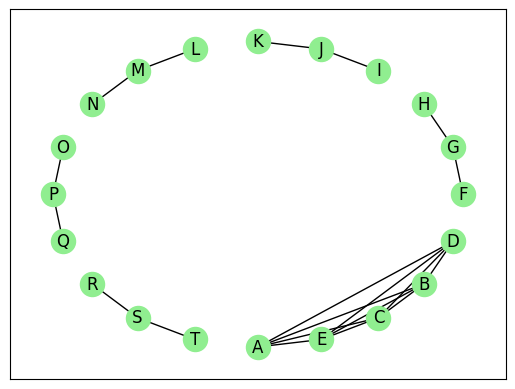

In [44]:
positions = nx.circular_layout(graph)
nx.draw_networkx(graph, pos = positions, node_color = "lightgreen")

In [47]:
# here, nodes A, B, C, D & E have a lcc of 1
# but nodes F through T have a very low lcc of 0

# since the nodes with greater degrees have higher lccs, we can expect the transitivity to be higher than the average lcc :))

print("Global clustering coefficient by averaging all local clusetring coefficients is {}.".format(nx.average_clustering(graph)))
print("Global clustering coefficient through transitivity is {}.".format(nx.transitivity(graph)))

Global clustering coefficient by averaging all local clusetring coefficients is 0.25.
Global clustering coefficient through transitivity is 0.8571428571428571.
